# K Nearest Neighbors
Necessary imports and plot functions used over the entire python notebook:

In [1]:
import numpy as np
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from math import log

In [2]:
# To plot figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
IMAGES_PATH = "./images"

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Data Retrival

In [3]:
data = scipy.io.loadmat('spamData.mat')
Xtrain, Xtest, ytrain, ytest = data['Xtrain'], data['Xtest'], data['ytrain'], data['ytest']
Xtrain.shape

(3065, 57)

## Preprocessing

In [4]:
eps = np.finfo(float).eps

def log_elem(x):
    return log(x + 0.1)
def binarize_elem(x):
    return 1 if x > eps else 0

def preprocess(X, method="z-norm", mean=None, std=None):
    if method=="z-norm":
        from scipy.stats import zscore
        return zscore(X, axis=0, ddof=1)
    elif method == "log-transform":
        npLog = np.vectorize(log_elem)
        return npLog(X)
    elif method == "binarization":
        npBinarize = np.vectorize(binarize_elem)
        return npBinarize(X)
    else:
        print("Undefined preprocessing option")

## K Nearest Neigbors Class

In [1]:
from math import log
import numpy as np
import pandas as pd
import operator
from sklearn.base import BaseEstimator, TransformerMixin

eps = np.finfo(float).eps

class KNearestNeighbors(BaseEstimator, TransformerMixin):
    def __init__(self, preprocess="z-norm", K = 5):
        self.preprocess = preprocess
        self.K = K
    
    def fit(self, X, y):
        self.X = preprocess(X, self.preprocess)
        self.y = y
        return self        
        
    def predict(self, x_new):
        distances = []
        for i in range(len(self.X)):
            if (self.preprocess == "binarization"):
                dist = np.count_nonzero(x_new!=self.X[i])
            else:
                dist = np.linalg.norm(x_new - self.X[i])
            distances.append((self.y[i], dist))
        distances.sort(key=operator.itemgetter(1))
        response = [0,0]
        for i in range(self.K):
            if distances[i][0] == 0:
                response[0] += 1
            else:
                response[1] += 1
        return np.argmax(response)
        
    def transform(self, X):
        X = preprocess(X, self.preprocess)
        ytilde = []
        for x in X:
            ytilde.append(self.predict(x))
        return ytilde

In [6]:
Kset = np.r_[1:10, 10:105:5]

## Pre-processing: Z-normalization

Saving figure Q4_1_alpha_vs_errorRate
Train Error rate for K = 1: 0.0006525285481240317
Train Error rate for K = 10: 0.08384991843393153
Train Error rate for K = 100: 0.12365415986949424
Test Error rate for K = 1: 0.10677083333333337
Test Error rate for K = 10: 0.115234375
Test Error rate for K = 100: 0.1484375


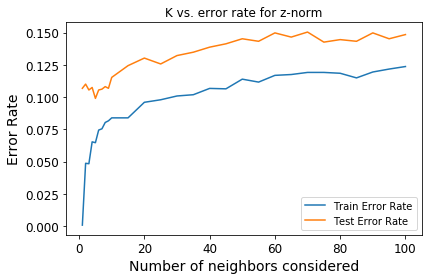

In [7]:
data = scipy.io.loadmat('spamData.mat')
ytrain, ytest = data['ytrain'], data['ytest']
error_rate_test = []
error_rate_train = []
for k in Kset:
    Xtrain, Xtest = data['Xtrain'], data['Xtest']
    knn = KNearestNeighbors(preprocess="z-norm", K = k)
    knn.fit(Xtrain, ytrain)
    ytilde = knn.transform(Xtrain)
    error_rate_train.append(1-accuracy_score(ytrain, ytilde, normalize=True))
    ytilde = knn.transform(Xtest)
    error_rate_test.append(1-accuracy_score(ytest, ytilde, normalize=True))
    
plt.plot(Kset, error_rate_train, label="Train Error Rate")
plt.plot(Kset, error_rate_test, label="Test Error Rate")
plt.title("K vs. error rate for z-norm")
plt.xlabel("Number of neighbors considered")
plt.ylabel("Error Rate")
plt.legend()
save_fig("Q4_1_alpha_vs_errorRate")
print("Train Error rate for K = 1: " + str(error_rate_train[0]))
print("Train Error rate for K = 10: " + str(error_rate_train[9]))
print("Train Error rate for K = 100: " + str(error_rate_train[-1]))
print("Test Error rate for K = 1: " + str(error_rate_test[0]))
print("Test Error rate for K = 10: " + str(error_rate_test[9]))
print("Test Error rate for K = 100: " + str(error_rate_test[-1]))

In [8]:
import scipy.io
data = scipy.io.loadmat('spamData.mat')
Xtrain, Xtest,ytrain, ytest = data['Xtrain'], data['Xtest'], data['ytrain'], data['ytest']
knn = KNearestNeighbors(preprocess="z-norm", K = 1)
knn.fit(Xtrain, ytrain)
ytilde = knn.transform(Xtrain)

In [51]:
cmp = ytilde != ytrain.ravel()
print(Xtrain[cmp])
distances = []
for x_new in Xtrain[cmp]:
    for i in range(len(Xtrain)):
        dist = np.linalg.norm(x_new - Xtrain[i])
        distances.append(((Xtrain[i]==x_new).all(), dist, ytrain[i][0]))
    distances.sort(key=operator.itemgetter(1))
    print(distances[0:2])

[[3.600e-01 0.000e+00 1.090e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 7.200e-01 1.810e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 7.200e-01 0.000e+00 1.090e+00
  0.000e+00 0.000e+00 7.200e-01 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 6.300e-02
  1.260e-01 0.000e+00 6.300e-02 1.260e-01 0.000e+00 2.562e+00 3.500e+01
  1.230e+02]
 [0.000e+00 3.400e-01 0.000e+00 0.000e+00 6.800e-01 0.000e+00 6.800e-01
  0.000e+00 0.000e+00 3.400e-01 3.400e-01 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 3.400e-01 0.000e+00 1.360e+00 3.420e+00 0.000e+00 2.730e+00
  0.000e+00 0.000e+00 0.000e+00 3.400e-01 3.400e-01 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 3.400e-01 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00

Here we see that there are two data points which are exactly the samin terms of feature values, but have different labels. Therefore, the KNN classifier always sorts them and gives the value '0' when K=1.

In [74]:
min_error = min(error_rate_test)
min_k = error_rate_test.index(min_error)
print("Minimum test error: " + str(min_error))
print("K value for minimum test error: " + str(Kset[min_k]))

Minimum test error: 0.09895833333333337
K value for minimum test error: 5


We will now get the statistics with the $K$ with the samllest error rate, $K = 5$

In [70]:
data = scipy.io.loadmat('spamData.mat')
Xtrain, Xtest, ytrain, ytest = data['Xtrain'], data['Xtest'], data['ytrain'], data['ytest']
knn = KNearestNeighbors(preprocess="z-norm", K = 5)
knn.fit(Xtrain, ytrain)
ytilde = knn.transform(Xtest)
error_rate = (1-accuracy_score(ytest, ytilde, normalize=True))
print("Confusion matrix for minimum test error: ")
print(confusion_matrix(ytest, ytilde))

Confusion matrix for minimum test error: 
[[884  71]
 [ 81 500]]


## Pre-processing: Log transform

Saving figure Q4_3_alpha_vs_errorRate_log
Train Error rate for K = 1: 0.0006525285481240317
Train Error rate for K = 10: 0.051876019575856414
Train Error rate for K = 100: 0.09233278955954327
Test Error rate for K = 1: 0.07552083333333337
Test Error rate for K = 10: 0.07421875
Test Error rate for K = 100: 0.09375


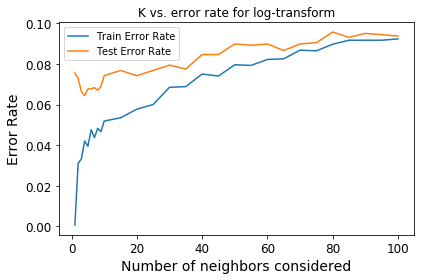

In [8]:
data = scipy.io.loadmat('spamData.mat')
ytrain, ytest = data['ytrain'], data['ytest']

error_rate_test = []
error_rate_train = []
for k in Kset:
    Xtrain, Xtest = data['Xtrain'], data['Xtest']
    knn = KNearestNeighbors(preprocess="log-transform", K = k)
    knn.fit(Xtrain, ytrain)
    ytilde = knn.transform(Xtrain)
    error_rate_train.append(1-accuracy_score(ytrain, ytilde, normalize=True))
    ytilde = knn.transform(Xtest)
    error_rate_test.append(1-accuracy_score(ytest, ytilde, normalize=True))
    
plt.plot(Kset, error_rate_train, label="Train Error Rate")
plt.plot(Kset, error_rate_test, label="Test Error Rate")
plt.title("K vs. error rate for log-transform")
plt.xlabel("Number of neighbors considered")
plt.ylabel("Error Rate")
plt.legend()
save_fig("Q4_3_alpha_vs_errorRate_log")
print("Train Error rate for K = 1: " + str(error_rate_train[0]))
print("Train Error rate for K = 10: " + str(error_rate_train[9]))
print("Train Error rate for K = 100: " + str(error_rate_train[-1]))
print("Test Error rate for K = 1: " + str(error_rate_test[0]))
print("Test Error rate for K = 10: " + str(error_rate_test[9]))
print("Test Error rate for K = 100: " + str(error_rate_test[-1]))

In [77]:
min_error = min(error_rate_test)
min_k = error_rate_test.index(min_error)
print("Minimum test error: " + str(min_error))
print("K value for minimum test error: " + str(Kset[min_k]))
data = scipy.io.loadmat('spamData.mat')
Xtrain, Xtest, ytrain, ytest = data['Xtrain'], data['Xtest'], data['ytrain'], data['ytest']
knn = KNearestNeighbors(preprocess="z-norm", K = Kset[min_k])
knn.fit(Xtrain, ytrain)
ytilde = knn.transform(Xtest)
error_rate = (1-accuracy_score(ytest, ytilde, normalize=True))
print("Confusion matrix for minimum test error: ")
print(confusion_matrix(ytest, ytilde))

Minimum test error: 0.064453125
K value for minimum test error: 4
Confusion matrix for minimum test error: 
[[903  52]
 [113 468]]


## Pre-processing: Binarization

Saving figure Q4_5_alpha_vs_errorRate_binary
Train Error rate for K = 1: 0.009461663947797683
Train Error rate for K = 10: 0.06655791190864602
Train Error rate for K = 100: 0.11615008156606854
Test Error rate for K = 1: 0.091796875
Test Error rate for K = 10: 0.09114583333333337
Test Error rate for K = 100: 0.11783854166666663


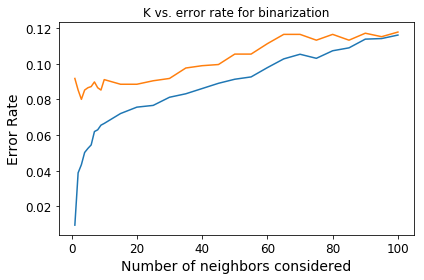

In [9]:
error_rate_test = []
error_rate_train = []
data = scipy.io.loadmat('spamData.mat')
Xtrain, Xtest, ytrain, ytest = data['Xtrain'], data['Xtest'], data['ytrain'], data['ytest']
for k in Kset:
    knn = KNearestNeighbors(preprocess="binarization", K = k)
    knn.fit(Xtrain, ytrain)
    ytilde = knn.transform(Xtrain)
    error_rate_train.append(1-accuracy_score(ytrain, ytilde, normalize=True))
    ytilde = knn.transform(Xtest)
    error_rate_test.append(1-accuracy_score(ytest, ytilde, normalize=True))
        
plt.plot(Kset, error_rate_train, label="Train Error Rate")
plt.plot(Kset, error_rate_test, label="Test Error Rate")
plt.title("K vs. error rate for binarization")
plt.xlabel("Number of neighbors considered")
plt.ylabel("Error Rate")
save_fig("Q4_5_alpha_vs_errorRate_binary")
print("Train Error rate for K = 1: " + str(error_rate_train[0]))
print("Train Error rate for K = 10: " + str(error_rate_train[9]))
print("Train Error rate for K = 100: " + str(error_rate_train[-1]))
print("Test Error rate for K = 1: " + str(error_rate_test[0]))
print("Test Error rate for K = 10: " + str(error_rate_test[9]))
print("Test Error rate for K = 100: " + str(error_rate_test[-1]))

In [84]:
min_error = min(error_rate_test)
min_k = error_rate_test.index(min_error)
print("Minimum test error: " + str(min_error))
print("K value for minimum test error: " + str(Kset[min_k]))
data = scipy.io.loadmat('spamData.mat')
Xtrain, Xtest, ytrain, ytest = data['Xtrain'], data['Xtest'], data['ytrain'], data['ytest']
knn = KNearestNeighbors(preprocess="z-norm", K = Kset[min_k])
knn.fit(Xtrain, ytrain)
ytilde = knn.transform(Xtest)
error_rate = (1-accuracy_score(ytest, ytilde, normalize=True))
print("Confusion matrix for minimum test error: ")
print(confusion_matrix(ytest, ytilde))

Minimum test error: 0.080078125
K value for minimum test error: 3
Confusion matrix for minimum test error: 
[[875  80]
 [ 82 499]]
